In [1]:
import numpy as np
import pandas as pd

from tensorflow.keras.datasets import mnist,cifar10
from tensorflow.keras.utils import to_categorical

from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_22761/912157614.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-10-03 14:16:41.923249: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 14:16:41.927891: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 14:16:41.994104: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX5

In [2]:
def load_environment(env_name = 'mnist'):
    
    if env_name == 'mnist':
        (x_train,y_train),(x_test,y_test) = mnist.load_data()
        x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
        x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
        x_train = x_train / 255
        x_test = x_test / 255
        y_train_sparse = to_categorical(y_train, num_classes=10)
        y_test_sparse = to_categorical(y_test, num_classes=10)
    elif env_name == 'cifar10':
        (x_train,y_train),(x_test,y_test) = cifar10.load_data()
        x_train = x_train / 255
        x_test = x_test / 255
        y_train_sparse = to_categorical(y_train, num_classes=10)
        y_test_sparse = to_categorical(y_test, num_classes=10)
    else:
        raise OSError(f'Could not load "{env_name}" data.')
    
    return x_train,y_train,x_test,y_test,y_train_sparse,y_test_sparse

def add_label_noise(
    train_labels,
    label_list = np.array(range(10), dtype='uint8'),
    noise = 0.05,
    seed = 16266
):
    '''
    labels = y_train
    label_list = list of all possible labels
    noise = percent of samples with noise added
    '''

    labels = np.array(train_labels, copy = True)

    rng = np.random.default_rng(seed=seed)

    n = int(len(labels) * noise) # number of samples to be modified

    samples_to_replace = rng.choice(len(labels), size = n, replace = False) # identify the indices of samples to replace

    replacements = [rng.choice(np.delete(label_list, labels[i])) for i in samples_to_replace] # randomly choose incorrect labels

    # Add noise to dataset
    for i in range(n):
        labels[samples_to_replace[i]] = replacements[i]
    
    labels_sparse = to_categorical(labels, num_classes=len(label_list))
    
    return labels,labels_sparse

def add_input_noise(
    train,
    noise = 0.05,
    seed = 16266
):
    '''
    train = x_train
    noise = stdev of gaussian
    '''

    noisy_train = np.array(train, copy = True)

    rng = np.random.default_rng(seed=seed)

    noise = rng.normal(scale = noise, size = train.shape)

    noisy_train = noisy_train + noise
    
    return noisy_train

In [8]:
dataset = 'mnist'
# dataset = 'cifar10'

x_train,y_train,x_test,y_test,y_train_sparse,y_test_sparse = load_environment(dataset)

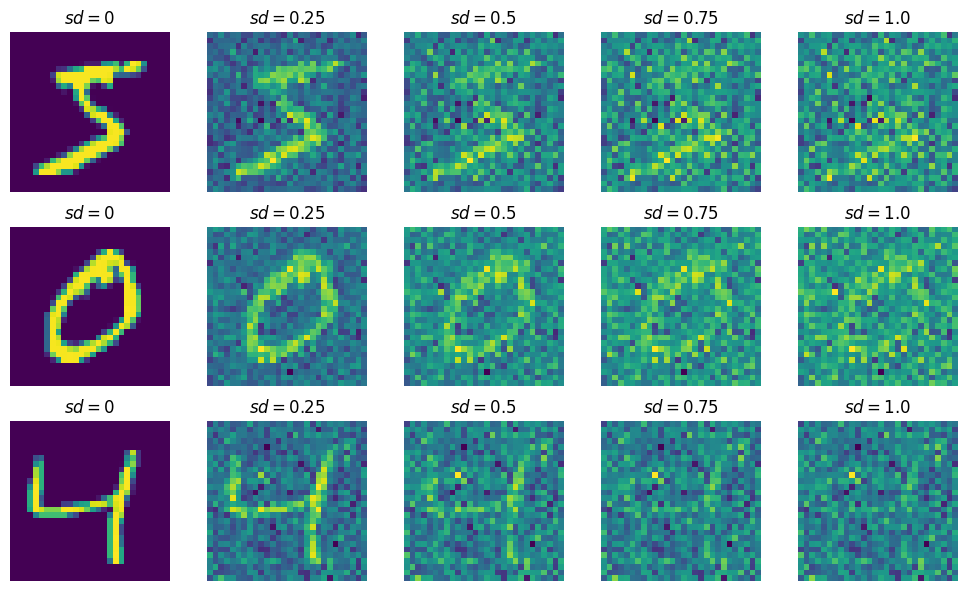

In [9]:
num_examples = 3

examples = []
for noise in list(product([0,0.25,0.5,0.75,1.],[0])):
    examples.append(add_input_noise(x_train[:num_examples], noise = noise[0]))

fig,ax = plt.subplots(ncols = 5, nrows = num_examples, figsize = (10,2*num_examples))
for i in enumerate(zip(examples,[0,0.25,0.5,0.75,1.])):
    for j in enumerate(i[1][0]):
        ax[j[0],i[0]].imshow(j[1])
        ax[j[0],i[0]].set_axis_off()
        ax[j[0],i[0]].set_title(f'$sd={i[1][1]}$')
plt.tight_layout()
plt.savefig('mnist_noisy_images.png', dpi = 250)
# plt.savefig('cifar10_noisy_images.png', dpi = 250)

In [27]:
dataset = 'cifar10'

x_train,y_train,x_test,y_test,y_train_sparse,y_test_sparse = load_environment(dataset)

In [29]:
y_train[0]

array([6], dtype=uint8)

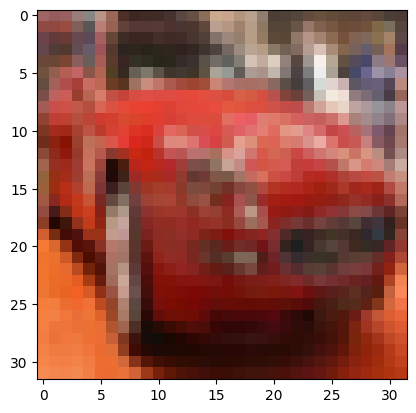

In [33]:
plt.imshow(x_train[5])